In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import altair as alt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [2]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
df.Floor

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4            1 out of 2
             ...       
4741         3 out of 5
4742         1 out of 4
4743         3 out of 5
4744       23 out of 34
4745         4 out of 5
Name: Floor, Length: 4746, dtype: object

###  Divide Number of floor out of how many floors

In [6]:
df.Floor = [row.replace('Ground','0') for row in df.Floor]

def check_floor(row):
    if 'Upper' in row:
        return True
    elif 'Lower' in row:
        return True
    else: return False

df['not_useful'] = [check_floor(row) for row in df.Floor]

df = df[df.not_useful == False]

def return_modular(my_list):
    if(len(my_list) < 2):
        return 0
    else:
        num1 = float(my_list[0])
        num2 = float(my_list[3])
        return num1 / num2
    
df['Floor_modular'] = [return_modular(row.split(' ')) for row in df.Floor]

In [7]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,not_useful,Floor_modular
0,2022-05-18,2,10000,1100,0 out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,False,0.000000
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,False,0.333333
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,False,0.333333
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,False,0.500000
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,False,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,False,0.600000
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,False,0.250000
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,False,0.600000
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,False,0.676471


In [8]:
df['Posted On'] = pd.to_datetime(df['Posted On'], format = "%Y/%m/%d")
df['Posted On']

0      2022-05-18
1      2022-05-13
2      2022-05-16
3      2022-07-04
4      2022-05-09
          ...    
4741   2022-05-18
4742   2022-05-15
4743   2022-07-10
4744   2022-07-06
4745   2022-05-04
Name: Posted On, Length: 4712, dtype: datetime64[ns]

In [9]:
df['Area Locality'].value_counts() #Delete column

Bandra West                  37
Gachibowli                   29
Electronic City              24
Miyapur, NH 9                22
Velachery                    22
                             ..
Taloja Phase 2                1
Paras Building, Sion East     1
Irla, Vile Parle West         1
Serenity Complex              1
Manikonda, Hyderabad          1
Name: Area Locality, Length: 2221, dtype: int64

In [10]:
df.City.value_counts()

Mumbai       956
Chennai      886
Bangalore    883
Hyderabad    860
Delhi        605
Kolkata      522
Name: City, dtype: int64

In [11]:
df['Tenant Preferred'].value_counts()

Bachelors/Family    3422
Bachelors            826
Family               464
Name: Tenant Preferred, dtype: int64

In [12]:
df['Area Type'].value_counts()

Super Area     2440
Carpet Area    2270
Built Area        2
Name: Area Type, dtype: int64

In [13]:
df[df['Area Type'] == 'Built Area']
df.drop([3079,3966], axis='rows',inplace=True)

In [14]:
df['Point of Contact'].value_counts() ##Ill drop Contact bUILDER


Contact Owner      3196
Contact Agent      1513
Contact Builder       1
Name: Point of Contact, dtype: int64

In [15]:
df[df['Point of Contact'] == 'Contact Builder']

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,not_useful,Floor_modular
4061,2022-06-18,1,5500,400,1 out of 2,Super Area,"Ramanthapur, NH 2 2",Hyderabad,Unfurnished,Bachelors/Family,1,Contact Builder,False,0.5


In [16]:
df.drop(4061,axis='rows',inplace= True)

Text(0.5, 1.0, 'Rent Distribution')

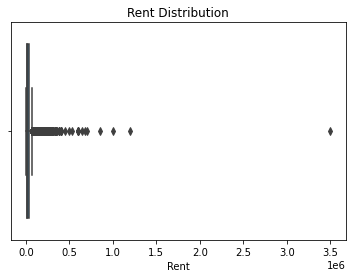

In [17]:
sns.boxplot(x = df.Rent)
plt.title('Rent Distribution')

In [18]:
alt.Chart(df).mark_circle().encode(y='Rent')

alt.Chart(...)

In [19]:
alt.Chart(df).mark_circle().encode(x='BHK')

alt.Chart(...)

In [20]:
# No missing values
#Remove rent outlier
#Remove useless columns
#Split data (and nominal vs numeric)
#Make PipeLine
#Model Comparison



In [21]:
#Remove rent outlier

df[df.Rent >3000000]
df.drop([1837], axis='rows', inplace= True)

In [22]:
df[df.Rent > 3000000]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,not_useful,Floor_modular


In [23]:
#Remove useless Columns
df.drop(['Posted On', 'Area Locality','not_useful','Floor'], axis='columns', inplace=True)

In [24]:
df

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor_modular
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0.000000
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.333333
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.333333
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,0.500000
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,0.500000
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,0.600000
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,0.250000
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,0.600000
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,0.676471


In [25]:
numerical = df.select_dtypes(include=np.number).columns.tolist()
nominal = df.select_dtypes(exclude = np.number).columns.tolist()

In [26]:
numerical

['BHK', 'Rent', 'Size', 'Bathroom', 'Floor_modular']

In [27]:
nominal

['Area Type',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

In [28]:
rent_data = pd.get_dummies(df, columns=nominal)
rent_data.head()

,BHK,Rent,Size,Bathroom,Floor_modular,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Owner
0,2,10000,1100,2,0.000000,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
1,2,20000,800,1,0.333333,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,2,17000,1000,1,0.333333,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
3,2,10000,800,1,0.500000,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
4,2,7500,850,1,0.500000,1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1


In [29]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4708 entries, 0 to 4745
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BHK                                4708 non-null   int64  
 1   Rent                               4708 non-null   int64  
 2   Size                               4708 non-null   int64  
 3   Bathroom                           4708 non-null   int64  
 4   Floor_modular                      4708 non-null   float64
 5   Area Type_Carpet Area              4708 non-null   uint8  
 6   Area Type_Super Area               4708 non-null   uint8  
 7   City_Bangalore                     4708 non-null   uint8  
 8   City_Chennai                       4708 non-null   uint8  
 9   City_Delhi                         4708 non-null   uint8  
 10  City_Hyderabad                     4708 non-null   uint8  
 11  City_Kolkata                       4708 non-null   uint8

In [30]:
rent_data = rent_data.reset_index(drop=True)
sS = StandardScaler()
scaled = sS.fit_transform(rent_data)
scaled_rent= pd.DataFrame(scaled,columns=sS.get_feature_names_out())
scaled_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BHK                                4708 non-null   float64
 1   Rent                               4708 non-null   float64
 2   Size                               4708 non-null   float64
 3   Bathroom                           4708 non-null   float64
 4   Floor_modular                      4708 non-null   float64
 5   Area Type_Carpet Area              4708 non-null   float64
 6   Area Type_Super Area               4708 non-null   float64
 7   City_Bangalore                     4708 non-null   float64
 8   City_Chennai                       4708 non-null   float64
 9   City_Delhi                         4708 non-null   float64
 10  City_Hyderabad                     4708 non-null   float64
 11  City_Kolkata                       4708 non-null   float

In [31]:
X = scaled_rent.drop('Rent',axis='columns')
y = scaled_rent['Rent']

In [32]:
X

,BHK,Size,Bathroom,Floor_modular,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Owner
0,-0.100859,0.213395,0.039677,-1.448875,-0.964520,0.964520,-0.480133,-0.481138,-0.383996,-0.472077,2.831812,-0.504775,-0.409108,-0.951068,1.272762,-0.460939,0.614012,-0.330652,-0.687816,0.687816
1,-0.100859,-0.264427,-1.092449,-0.400977,-0.964520,0.964520,-0.480133,-0.481138,-0.383996,-0.472077,2.831812,-0.504775,-0.409108,1.051449,-0.785693,-0.460939,0.614012,-0.330652,-0.687816,0.687816
2,-0.100859,0.054121,-1.092449,-0.400977,-0.964520,0.964520,-0.480133,-0.481138,-0.383996,-0.472077,2.831812,-0.504775,-0.409108,1.051449,-0.785693,-0.460939,0.614012,-0.330652,-0.687816,0.687816
3,-0.100859,-0.264427,-1.092449,0.122973,-0.964520,0.964520,-0.480133,-0.481138,-0.383996,-0.472077,2.831812,-0.504775,-0.409108,-0.951068,1.272762,-0.460939,0.614012,-0.330652,-0.687816,0.687816
4,-0.100859,-0.184790,-1.092449,0.122973,1.036785,-1.036785,-0.480133,-0.481138,-0.383996,-0.472077,2.831812,-0.504775,-0.409108,-0.951068,1.272762,2.169485,-1.628632,-0.330652,-0.687816,0.687816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4703,-0.100859,0.054121,0.039677,0.437342,1.036785,-1.036785,-0.480133,-0.481138,-0.383996,2.118296,-0.353131,-0.504775,-0.409108,1.051449,-0.785693,-0.460939,0.614012,-0.330652,-0.687816,0.687816
4704,1.101273,1.646860,1.171804,-0.662951,-0.964520,0.964520,-0.480133,-0.481138,-0.383996,2.118296,-0.353131,-0.504775,-0.409108,1.051449,-0.785693,-0.460939,0.614012,-0.330652,-0.687816,0.687816
4705,1.101273,1.248675,1.171804,0.437342,1.036785,-1.036785,-0.480133,-0.481138,-0.383996,2.118296,-0.353131,-0.504775,-0.409108,1.051449,-0.785693,-0.460939,0.614012,-0.330652,1.453876,-1.453876
4706,1.101273,0.850491,0.039677,0.677742,1.036785,-1.036785,-0.480133,-0.481138,-0.383996,2.118296,-0.353131,-0.504775,-0.409108,1.051449,-0.785693,-0.460939,-1.628632,3.024327,1.453876,-1.453876


In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [34]:
bosque = RandomForestRegressor(n_estimators=100,random_state=42)


In [35]:
bosque.fit(X_train,y_train)

train_pred = bosque.predict(X_train)

In [36]:
mae_rf = metrics.mean_absolute_error(y_train, train_pred)
mse_rf =  metrics.mean_squared_error(y_train, train_pred)
rmse_rf =  np.sqrt(mse_rf)

In [37]:
print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)

MAE: 0.0788220500463176
MSE: 0.051669230001215136
RMSE: 0.2273086667974082
